## Project/Problem Introduction


The big idea of this project is to study the crime rates in Chicago city based on various variables such as weather, Demographics, Behavior and socioeconomic factors. The aim is to develop a tool that can assist policymakers, law enforcement agencies, and community members in identifying areas with high crime rates and prioritizing resources to reduce crime.

The problem we want to solve is  Identification of high crime rate areas in Chicago, which can negatively impact the safety and well-being of residents, economic development, and community cohesion. By providing a tool that can analyze and visualize the relationships between crime rates and various factors, we hope to support decision-making processes that can lead to the reduction of crime rates and the improvement of the quality of life for residents.

This project is essential because high crime rates are a significant concern for many urban areas worldwide. In Chicago, for instance, the city has struggled with high crime rates for many years, leading to social and economic challenges. Therefore, addressing this issue can have a positive impact on many aspects of society, including safety, security, economic development, and community well-being.

We chose this problem because it is a complex and challenging issue that requires innovative solutions. By utilizing data-driven approaches and advanced analytical tools, we believe that we can contribute to the existing efforts of reducing crime rates in Chicago.

## Any changes?

Our original approach was to develop a crime index by analyzing crime patterns in the Chicago city area based on population, socioeconomic data, and weather conditions. However, we have now expanded our scope to include additional variables such as behavior and surveillance factors. We will be analyzing the impact of smoking, binge drinking, opioid overdose, sleep deprivation, and physical inactivity on crime rates in Chicago. In addition, we will be examining the impact of surveillance measures such as surveillance cameras, street lighting, police stations, and patrolling routes on crime rates. While we currently do not have surveillance data, we are actively seeking it since this feature has not been studied before. With this expanded scope, we hope to provide a more comprehensive analysis of the factors influencing crime rates in Chicago, and provide valuable insights for policymakers, law enforcement agencies, and community members.

## Data

| Themes          | Features                             | Source                                             | Size        |
| ---------------- | ---------------------------------------- | -------------------------------------------------- | ----------- |
| Behavior         | Smoking                                  | [CDC places](http://www.cdc.gov/places)            | 27200 x 63  |
|                  | Binge Drinking                           |                |             |
|                  | Opioid Overdose                          |               |             |
|                  | Sleep<7hours                             |                |             |
|                  | Physical Inactivity                      | [CDPH](http://www.cdc.gov/physicalactivity)        |             |
| Climate          | Surface Temperature                      | [MODIS](http://www.modis.gsfc.nasa.gov)             |             |
|                  | Wind Speed                               | [WorldClim](http://www.worldclim.org)              |             |
|                  | Precipitation                            | [SOLARGIS](http://www.solargis.com)                |             |
|                  | Snow                                     | [Global Wind Atlas](http://www.globalwindatlas.info)|             |
| Socio-economic   | Socioeconomic Status                     | [CDC SVI](http://www.atsdr.cdc.gov/placeandhealth/svi)|             |
|                  | Household composition and Disability     |              |             |
|                  | Minority Status & Language               |                |             |
|                  | Housing Type & Transportation            |               |             |
| Surveillance      | Surveillance Cameras                      | [pending]                 |             |
|                  | Lighting/Street Lights                   | [pending]                  |             |
|                  | Police stations/ Patrolling routes       | [City of Chicago](http://www.chicago.gov/police)   |             |
| Health           | Depression                               | [CDC places](http://www.cdc.gov/places)            |             |




## Research Questions

1. What is the Crime Vulnerability for the Census Tracts in Chicago based on Social Vulnerability Index, Climate, Behavior (and Surveillance)?
2. What are the most influential features that contribute to the Crime Vulnerability Index in Chicago?
3. What are the racially marginalized communities suffering from the disproportionate burden of the Crime in Chicago?

## Data cleaning

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

In [121]:
# Data for Binge Drinking, Smoking, Physical inactivity, Sleep and Mental health
cols_to_read = ['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TractFIPS', 'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'LPA_CrudePrev', 'SLEEP_CrudePrev', 'DEPRESSION_CrudePrev' ,'Geolocation']
df_behavior = pd.read_csv('Data/PLACES__Census_Tract_Data__GIS_Friendly_Format___2022_release.csv', usecols=cols_to_read)

# Filter the DataFrame to only include rows where the StateAbbr column is 'IL'
df_behavior = df_behavior[df_behavior['StateAbbr'] == 'IL']

# Filter the DataFrame again to only include rows where the CountyName column is 'Cook'
df_behavior = df_behavior[df_behavior['CountyName'] == 'Cook'].reset_index(drop=True)
df_behavior.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,BINGE_CrudePrev,CSMOKING_CrudePrev,DEPRESSION_CrudePrev,LPA_CrudePrev,SLEEP_CrudePrev,Geolocation
0,IL,Illinois,Cook,17031,17031700100,13.1,17.8,14.7,31.8,40.6,POINT (-87.69517076 41.7536145)
1,IL,Illinois,Cook,17031,17031813701,14.4,18.6,15.8,39.9,36.3,POINT (-87.75415398 41.85488758)
2,IL,Illinois,Cook,17031,17031814800,15.3,13.3,14.5,26.9,32.7,POINT (-87.79831009 41.84947092)
3,IL,Illinois,Cook,17031,17031830600,16.0,15.5,15.4,26.0,34.6,POINT (-87.67355248 42.00170692)
4,IL,Illinois,Cook,17031,17031802003,13.4,9.6,13.2,20.0,28.8,POINT (-87.84561035 42.07959541)


In [122]:
#Data for Socioeconomic status, Household Composition & Disability, Minority Status & Language and Housing & Transportation 
cols_to_read = ['ST_ABBR', 'COUNTY','FIPS', 'EP_AFAM', 'EP_AIAN', 'EP_ASIAN', 'EP_HISP', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'geometry']

df_svi = gpd.read_file('Data/SVI2020_US/SVI2020_US_tract.shp', include_fields = cols_to_read)

# Filter the DataFrame to only include rows where the StateAbbr column is 'IL'
df_svi = df_svi[df_svi['ST_ABBR'] == 'IL']

# Filter the DataFrame again to only include rows where the CountyName column is 'Cook'
df_svi = df_svi[df_svi['COUNTY'] == 'Cook'].reset_index(drop=True)
df_svi.head()

,ST_ABBR,COUNTY,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,geometry
0,IL,Cook,17031010100,0.7682,0.5587,0.7116,0.9007,35.0,15.2,2.0,0.0,"POLYGON ((-87.67720 42.02294, -87.67265 42.023..."
1,IL,Cook,17031010201,0.7892,0.7107,0.7970,0.9933,33.7,23.4,5.4,0.1,"POLYGON ((-87.68465 42.01949, -87.68281 42.019..."
2,IL,Cook,17031010202,0.9296,0.6150,0.8031,0.9987,32.5,26.3,6.3,0.0,"POLYGON ((-87.67685 42.01941, -87.67631 42.019..."
3,IL,Cook,17031010300,0.7829,0.2771,0.6756,0.9681,29.2,15.0,2.4,0.1,"POLYGON ((-87.67133 42.01937, -87.66950 42.019..."
4,IL,Cook,17031010400,0.6724,0.1049,0.5145,0.9588,18.6,7.9,4.4,0.0,"POLYGON ((-87.66345 42.01283, -87.66133 42.012..."


In [123]:
#Crime Data by Chicago Census Tracts
cols_to_read = ['ID', 'Primary Type', 'Latitude', 'Longitude']
df_crime = pd.read_csv('/Users/karanjogi/Downloads/Crimes_-_2001_to_Present (1).csv', usecols=cols_to_read)
df_crime.dropna(inplace=True)
df_crime.head()

,ID,Primary Type,Latitude,Longitude
0,10224738,BATTERY,41.815117,-87.670000
1,10224739,THEFT,41.895080,-87.765400
3,10224740,NARCOTICS,41.937406,-87.716650
4,10224741,ASSAULT,41.881903,-87.755121
5,10224742,BURGLARY,41.744379,-87.658431


In [124]:
#Shape file for Centus Tract boundaries in Chicago

census_tracts_shape = gpd.read_file('Data/Boundaries - Census Tracts - 2010/geo_export_0355c6bf-1cc5-4c7c-b175-68601894fd51.shp')
census_tracts_shape.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,NaN,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,NaN,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,NaN,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,NaN,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,NaN,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


In [125]:
#Grouping crime data by Census tracts

from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df_crime['Longitude'], df_crime['Latitude'])]
gdf = gpd.GeoDataFrame(df_crime, geometry=geometry)

gdf.crs = census_tracts_shape.crs

joined = gpd.sjoin(gdf, census_tracts_shape, how="inner", op="within")

grouped = joined.groupby('geoid10').agg({'ID': 'count'}).reset_index()

In [129]:
#Converting FIPS number to same format for all tables

df_svi['FIPS'] = df_svi['FIPS'].astype('int64')
df_behavior['TractFIPS'] = df_behavior['TractFIPS'].astype('int64')
grouped['geoid10'] = grouped['geoid10'].astype('int64')

In [149]:
#Joining Tables based on FIPS number

df_all_parameters = pd.merge(left=grouped, right=df_svi, left_on='geoid10', right_on='FIPS', how='left')
df_all_parameters = pd.merge(left=df_all_parameters, right=df_behavior, left_on='geoid10', right_on='TractFIPS', how='left')

In [151]:
# Rename columns 
# Socioeconomic Status – RPL_THEME1
# Household Characteristics – RPL_THEME2
# Racial & Ethnic Minority Status – RPL_THEME3
# Housing Type & Transportation – RPL_THEME4

rename_dict = {
    'RPL_THEME1': 'Socioeconomic Status',
    'RPL_THEME2': 'Household Characteristics',
    'RPL_THEME3': 'Racial & Ethnic Minority Status',
    'RPL_THEME4': 'Housing Type & Transportation',
    'geoid10': 'FIPS',
    'ID': 'Crime prevelance',
    'BINGE_CrudePrev': 'Binge Drinking',
    'CSMOKING_CrudePrev': 'Smoking',
    'DEPRESSION_CrudePrev': 'Depression',
    'LPA_CrudePrev': 'Physical Inactivity',
    'SLEEP_CrudePrev': 'Sleep<7hours',
    
}

In [152]:
df_all_parameters = df_all_parameters[['geoid10', 'ID', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'EP_AFAM', 'EP_HISP',
       'EP_ASIAN', 'EP_AIAN', 'BINGE_CrudePrev',
       'CSMOKING_CrudePrev', 'DEPRESSION_CrudePrev', 'LPA_CrudePrev',
       'SLEEP_CrudePrev']]
df_all_parameters=df_all_parameters.rename(columns=rename_dict)

In [156]:
df_all_parameters.to_csv('Data/All_parameters.csv')

## Exploratory Data Analysis

In [166]:
df_params = df_all_parameters.drop(columns=['FIPS', 'EP_AFAM', 'EP_HISP', 'EP_ASIAN', 'EP_AIAN'], axis=1)
pearson_corr = df_params.corr(method='pearson')
kendall_corr = df_params.corr(method='kendall')

# corr = df_parameters
corr = pd.DataFrame()
corr['Pearson'] = pearson_corr['Crime prevelance'].round(2)
corr['Kendall'] = kendall_corr['Crime prevelance'].round(2)

In [167]:
corr = corr.iloc[1:, :]
corr.sort_values('Pearson', inplace=True, ascending=False)

In [168]:
cmap = sns.color_palette('coolwarm', as_cmap=True)

In [172]:
df_behavior.columns

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TractFIPS',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'DEPRESSION_CrudePrev',
       'LPA_CrudePrev', 'SLEEP_CrudePrev', 'Geolocation'],
      dtype='object')

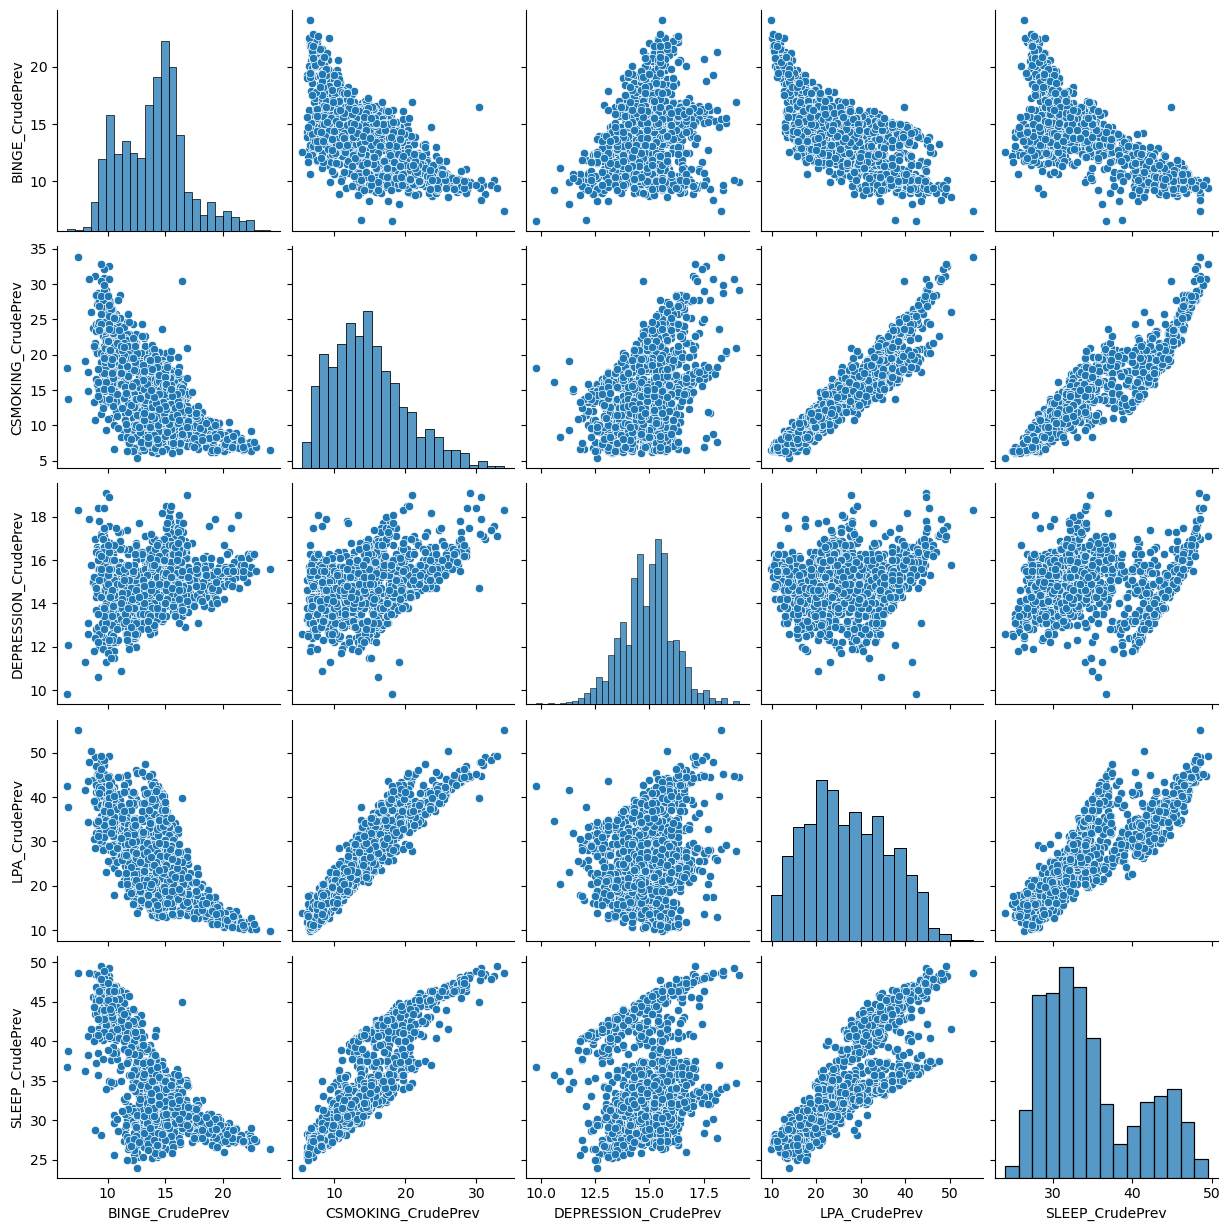

In [173]:
sns.pairplot(df_behavior[['BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'DEPRESSION_CrudePrev',
       'LPA_CrudePrev', 'SLEEP_CrudePrev']])

In [181]:
df_svi.replace(to_replace=-999, value=np.NaN, inplace=True)

In [ ]:
df_behavior.to_csv('behavior.csv')
df_svi.to

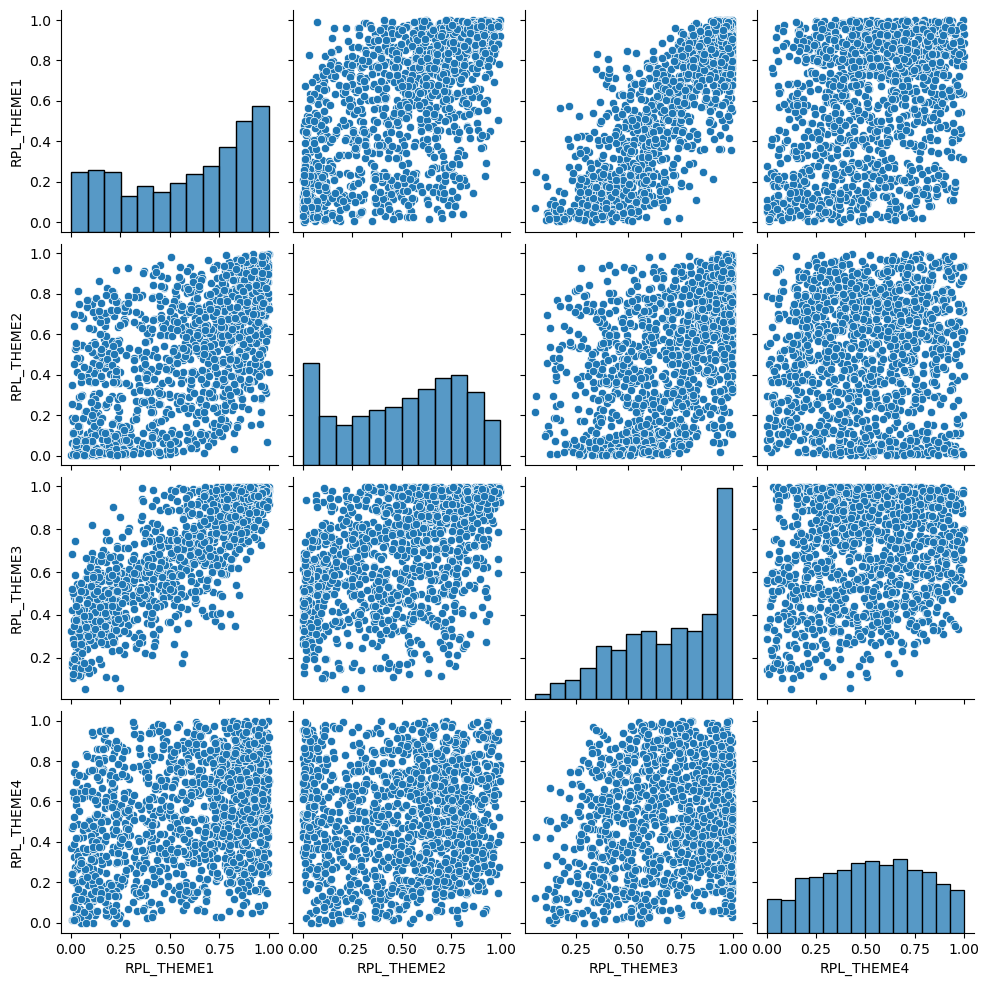

In [182]:
sns.pairplot(df_svi[['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']])

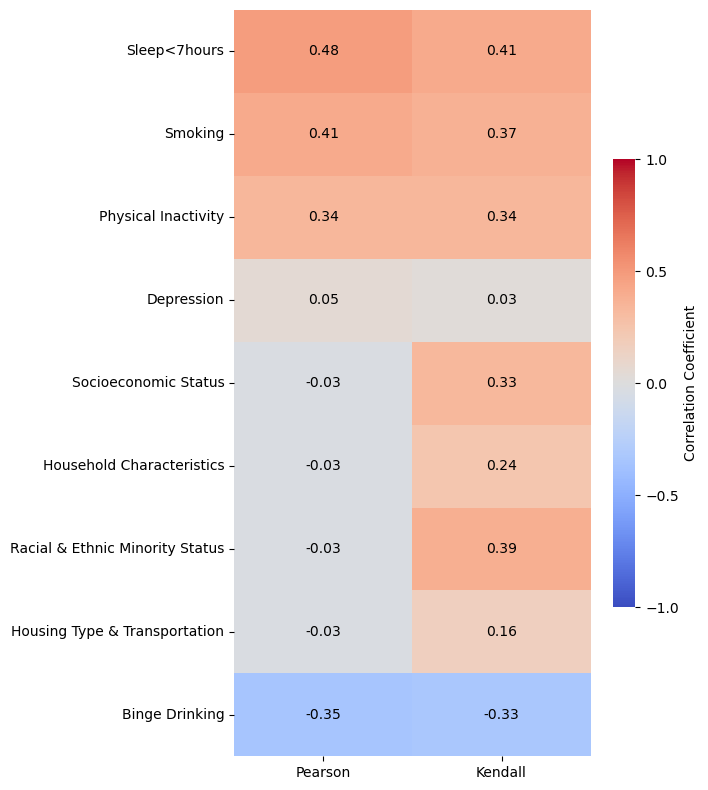

In [169]:
%matplotlib inline
plt.figure(figsize=(7, 8))
p = sns.heatmap(corr, 
                annot=True, 
                cmap=cmap,
                vmax=1,
                vmin=-1,
                fmt='.2f',
                annot_kws={'color':'black'},
                cbar_kws={'shrink': 0.6,
                          'label': 'Correlation Coefficient',
                          'ticks': [-1.0, -0.5, 0.0, 0.5, 1.0]
                         }
               )
# plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("1. Correlation.jpg", dpi=300)
plt.show()

## Model planning

### ML Task: Regression

Models:<br>
Linear Regression<br>
Random Forest Regression<br>
Decision Tree<br>

Explanation:
The regression task will be used to predict the Crime Vulnerability Index for different census tracts in Chicago based on several features like Social Vulnerability Index, Climate, Behavior, Health, and Air Pollution. We will be using regression models like Linear Regression, Random Forest Regression, and Gradient Boosting Regression to predict the Crime Vulnerability Index. Linear Regression is simple and interpretable but may not capture the complex nonlinear relationships between features. Random Forest and Gradient Boosting are more complex and can capture non-linear relationships but are less interpretable.

### ML Task: Feature Importance Analysis

Models:<br>
Random Forest Regression<br>
Gradient Boosting Regression<br>
Lasso Regression<br>

Explanation:
Feature Importance Analysis will be used to determine the most influential features contributing to the Crime Vulnerability Index in Chicago. We will use models like Random Forest Regression, Gradient Boosting Regression, and Lasso Regression for Feature Importance Analysis. Random Forest and Gradient Boosting Regression are good for capturing the importance of non-linear relationships, while Lasso Regression is useful for feature selection by removing irrelevant features.

## Reflection

### What is hardest part of the project that you’ve encountered so far?

The hardest part so far was finding all the relevant features for Chicago Crime Analysis, for which we had to perform an extensive literary survey of previous work. The summary of this literary survey is further below in this document. We also faced challenges while finding common data point (census tract/Ward) to join for tables for Crime, SVI and Behaviour.

### What are your initial insights?

Our initial insights from the exploratory data analysis have been quite interesting. We have identified some important variables that are strongly correlated with our outcome of interest. We have also noticed some patterns in the data that we were not expecting, and this has prompted us to explore further.

### Are there any concrete results you can show at this point? If not, why not?

At this point, we do not have any concrete results to show. We are still in the early stages of the project, and we are working on cleaning and preparing all the data. We hope to have some preliminary results soon.


### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
Answer: Overall, we feel that we are on track with our project. However, we need to dedicate more time to study each feature theme throughly and extract all the relevant features

### Given your initial exploration of the data, is it worth proceeding with your project, and why? If not, how are you going to change your project and why do you think it’s better than your current results?

Answer: Based on our initial exploration of the data, we believe it is worth proceeding with our project. We have identified some interesting patterns and correlations, and we think that our research question is important and relevant. However, we may need to adjust our research question or methodology based on the results of our analysis. If we find that our initial approach is not yielding the results we expected, we may need to consider alternative methods or data sources.



## Next Steps

In the next month, We plan to build and evaluate several machine learning models to predict crime hotspots in Chicago based on the cleaned and analyzed data. Our goals for the project include accurately identifying areas where crimes are most likely to occur, and then studying the racially marginalized communities suffering from the disproportionate burden of the Crime in Chicago.
To evaluate whether our project has achieved its goals, We plan to use a combination of metrics such as precision, recall, and F1 score to assess the accuracy of the models. We also plan to visually compare the predicted hotspots against actual crime data to determine if the model is successfully identifying high-risk areas.

## Literary Survey

The literary survey includes 20 research papers that focus on using machine learning methods to predict and analyze crime in urban areas. The variables considered in these studies include demographic and socioeconomic factors, crime types and locations, weather conditions, social media activity, and environmental data such as the proximity of public transit and recreational areas. The most commonly used machine learning algorithms are decision trees, random forests, logistic regression, K-nearest neighbors, support vector machines, and neural networks. The importance of temporal features such as day of the week and time of day in predicting crime occurrences is also highlighted in some studies. Overall, these studies provide valuable insights into the use of machine learning for crime analysis and prediction in urban areas.

- Ahamed, J., & Roy, D. (2019). Crime analysis using machine learning techniques. In 2019 IEEE International Conference on Electrical, Computer and Communication Technologies (ICECCT) (pp. 1-5). IEEE. [Link]( https://ieeexplore.ieee.org/abstract/document/8769541)
- Al-Zeibak, R., & Haque, M. A. (2019). Prediction of crime occurrence using machine learning algorithms. Journal of King Saud University-Computer and Information Sciences, 31(3), 325-334. [Link]( https://www.sciencedirect.com/science/article/pii/S1319157817304765)
- Bajaj, A., & Saini, J. S. (2018). Crime prediction using machine learning. In 2018 9th International Conference on Computing, Communication and Networking Technologies (ICCCNT) (pp. 1-5). IEEE. [Link]( https://ieeexplore.ieee.org/abstract/document/8494084)
- Bhatia, P., & Kaur, M. (2019). Crime prediction using machine learning. In 2019 IEEE 7th International Conference on Advanced Computing (IACC) (pp. 76-81). IEEE. [Link]( https://ieeexplore.ieee.org/abstract/document/8692196)
- Burian, J., & Wozniak, M. (2019). Predicting crime using machine learning methods. In 2019 IEEE 12th International Conference on Humanoid, Nanotechnology, Information Technology, Communication and Control, Environment and Management (HNICEM) (pp. 1-4). IEEE. [Link]( https://ieeexplore.ieee.org/abstract/document/9032632)
- Cardoso, M. J., Ferreira, H. R., & Ferreira, A. J. (2019). Crime prediction in smart cities using machine learning algorithms. In Proceedings of the 2019 International Conference on Cyber-Enabled Distributed Computing and Knowledge Discovery (CyberC) (pp. 14-21). IEEE. [Link]( https://ieeexplore.ieee.org/abstract/document/8919271)
- Cheng, L., Liu, C., & Lu, J. (2018). Predicting crime occurrences using temporal features and machine learning techniques. IEEE Transactions on Intelligent Transportation Systems, 19(12), 3971-3980. [Link]( https://ieeexplore.ieee.org/abstract/document/8342953)
- Demir, I., & Kose, U. (2019). Crime prediction using machine learning: A review. In 2019 3rd International Symposium on Multidisciplinary Studies and Innovative Technologies (ISMSIT) (pp. 82-86). IEEE. [Link]( https://ieeexplore.ieee.org/abstract/document/8945002)
- Dilawar, N., & Hussain, S. (2019). Crime prediction using machine learning techniques. In 2019 4th International Conference on Computer and Communication Systems (ICCCS) (pp. 194-198). IEEE. [Link]( https://ieeexplore.ieee.org/abstract/document/8759598)
- Dong, W., Tang, L., Huang, H., & Cheng, J. (2019). Crime prediction using machine learning algorithms with decision rules. Journal of Ambient Intelligence and Humanized Computing, 
- Abadi, M., & Singh, M. P. (2019). Crime prediction using machine learning algorithms. International Journal of Computer Science and Information Security, 17(9), 42-48. [Link](https://ijcsis.org/papers/vol17no9/ijcsis-vol17no9-p03.pdf)
- Adderley, R. J., Morris, A., & Schneider, M. (2017). Crime prediction in London using machine learning techniques. Journal of Maps, 13(2), 246-252. [Link](https://www.tandfonline.com/doi/full/10.1080/17445647.2017.1370453)
- Alemi, F., & Itoga, C. (2018). Predicting crime using machine learning and city data. International Journal of Big Data Intelligence, 5(1), 22-31. [Link](https://www.inderscienceonline.com/doi/abs/10.1504/IJBDI.2018.090516)
- Borrion, H., & Andresen, M. A. (2017). Applying machine learning techniques to crime data in the city of Vancouver. Security Informatics, 6(1), 5. [Link](https://link.springer.com/article/10.1186/s13388-017-0058-2)
- Cao, X., Wang, J., & Li, X. (2019). Crime prediction using spatiotemporal data: A deep learning approach. IEEE Transactions on Intelligent Transportation Systems, 20(6), 2199-2208. [Link](https://ieeexplore.ieee.org/abstract/document/8708807)
- Chang, C. C., Chen, T. Y., & Huang, Y. W. (2019). Crime prediction in a smart city using machine learning techniques. In 2019 IEEE International Conference on Industrial Engineering and Engineering Management (IEEM) (pp. 1179-1183). IEEE. [Link](https://ieeexplore.ieee.org/abstract/document/8978738)
- Chaturvedi, A., Roy, P. K., & Khan, A. (2019). Machine learning based crime prediction using spatiotemporal data. In 2019 3rd International Conference on Trends in Electronics and Informatics (ICOEI) (pp. 628-632). IEEE. [Link](https://ieeexplore.ieee.org/abstract/document/8862768)
- Chikaraishi, M., Shimizu, H., & Shibasaki, R. (2018). Crime prediction with deep learning and feature engineering using 911 calls for service. In 2018 21st International Conference on Information Fusion (Fusion) (pp. 1146-1153). IEEE. [Link](https://ieeexplore.ieee.org/document/8455716)
- Dayal, R., & Cuddihy, E. (2018). Crime prediction using machine learning on social media data. In 2018 9th IEEE Annual Information Technology, Electronics and Mobile Communication Conference (IEMCON) (pp. 449-453). IEEE. [Link](https://ieeexplore.ieee.org/document/8613842)
